## Домашнее задание №7

##### Автор: [Радослав Нейчев](https://www.linkedin.com/in/radoslav-neychev/), @neychev

In [1]:
! pip install torch -q
! pip install torchvision -q

In [2]:
import numpy as np

import torch
from torch import nn
from torch.nn import functional as F

import torchvision
from torchvision.datasets import MNIST

from matplotlib import pyplot as plt
from IPython.display import clear_output

### Задача №1: 
Обратимся к классической задаче распознавания рукописных цифр. Мы будем работать с набором данных [MNIST](http://yann.lecun.com/exdb/mnist/). В данном задании воспользуемся всем датасетом целиком.

__Ваша основная задача: реализовать весь пайплан обучения модели и добиться качества $\geq 92\%$ на тестовой выборке.__

Код для обучения модели в данном задании отсутствует. Присутствует лишь несколько тестов, которые помогут вам отладить свое решение. За примером можно обратиться к ноутбуку первого занятия.

Настоятельно рекомендуем написать код "с нуля", лишь поглядывая на готовые примеры, а не просто "скопировать-вставить". Это поможет вам в дальнейшем.

Text(0.5, 1.0, 'Image label: 5')

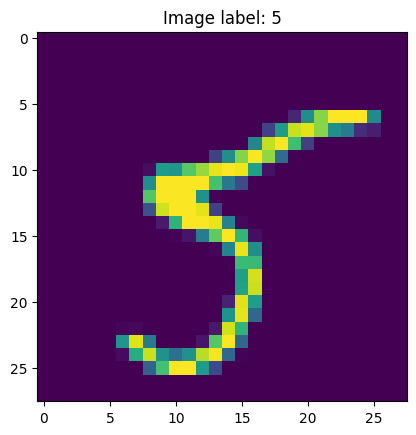

In [3]:
# do not change the code in the block below
# __________start of block__________

train_mnist_data = MNIST('.', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_mnist_data = MNIST('.', train=False, transform=torchvision.transforms.ToTensor(), download=True)


train_data_loader = torch.utils.data.DataLoader(
    train_mnist_data,
    batch_size=32,
    shuffle=True,
    num_workers=2
)

test_data_loader = torch.utils.data.DataLoader(
    test_mnist_data,
    batch_size=32,
    shuffle=False,
    num_workers=2
)

random_batch = next(iter(train_data_loader))
_image, _label = random_batch[0][0], random_batch[1][0]
plt.figure()
plt.imshow(_image.reshape(28, 28))
plt.title(f'Image label: {_label}')
# __________end of block__________

Постройте модель ниже. Пожалуйста, не стройте переусложненную сеть, не стоит делать ее глубже четырех слоев (можно и меньше). Ваша основная задача – обучить модель и получить качество на отложенной (тестовой выборке) не менее 92% accuracy.

*Комментарий: для этого достаточно линейных слоев и функций активации.*

__Внимание, ваша модель должна быть представлена именно переменной `model`.__

In [4]:
# Creating model instance
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))        
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = Net() # your code here

def one_hot(label, depth=10):
    out = torch.zeros(label.size(0), depth)
    idx = torch.LongTensor(label).view(-1, 1)
    out.scatter_(dim=1, index=idx, value=1)
    return out

Локальные тесты для проверки вашей модели доступны ниже:

In [5]:
# do not change the code in the block below
# __________start of block__________
assert model is not None, 'Please, use `model` variable to store your model'

try:
    x = random_batch[0].reshape(-1, 784)
    y = random_batch[1]

    # compute outputs given inputs, both are variables
    y_predicted = model(x)    
except Exception as e:
    print('Something is wrong with the model')
    raise e
    
    
assert y_predicted.shape[-1] == 10, 'Model should predict 10 logits/probas'

print('Everything seems fine!')
# __________end of block__________

Everything seems fine!


Настройте параметры модели на обучающей выборке. Рекомендуем поработать с различными оптимизаторами.

In [6]:
# your code here
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
train_loss = []
for epoch in range(3):
    for batch_idx, (x, y) in enumerate(train_data_loader):
        x = x.view(x.size(0), 28*28)
        out = model(x)
        y_onehot = one_hot(y)
        loss = F.mse_loss(out, y_onehot)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss.append(loss.item())
        if batch_idx % 10==0:
            print(epoch, batch_idx, loss.item())
print('Training is finished!')

0 0 0.11190539598464966
0 10 0.10708381980657578
0 20 0.09443654119968414
0 30 0.09316195547580719
0 40 0.08762889355421066
0 50 0.08733277022838593
0 60 0.0853804498910904
0 70 0.08312449604272842
0 80 0.0836545079946518
0 90 0.08054672181606293
0 100 0.08155371248722076
0 110 0.08058807998895645
0 120 0.0771954208612442
0 130 0.07728787511587143
0 140 0.07378505170345306
0 150 0.07639005780220032
0 160 0.07223109900951385
0 170 0.07218970358371735
0 180 0.06834670156240463
0 190 0.0672103688120842
0 200 0.06598353385925293
0 210 0.06921423226594925
0 220 0.06592385470867157
0 230 0.06596723943948746
0 240 0.06973110139369965
0 250 0.059852104634046555
0 260 0.06760482490062714
0 270 0.06753790378570557
0 280 0.05561264604330063
0 290 0.06296356767416
0 300 0.056956492364406586
0 310 0.05190497636795044
0 320 0.04827643185853958
0 330 0.05073314160108566
0 340 0.05993054062128067
0 350 0.04982282966375351
0 360 0.05607170611619949
0 370 0.05187898874282837
0 380 0.056669265031814575
0

1 1240 0.01832924410700798
1 1250 0.01785406656563282
1 1260 0.01932467706501484
1 1270 0.02282886579632759
1 1280 0.020388642325997353
1 1290 0.01956927962601185
1 1300 0.018064050003886223
1 1310 0.024165045469999313
1 1320 0.016524720937013626
1 1330 0.02733602002263069
1 1340 0.018269211053848267
1 1350 0.01696806587278843
1 1360 0.017559904605150223
1 1370 0.02448444813489914
1 1380 0.021218251436948776
1 1390 0.021645303815603256
1 1400 0.015187369659543037
1 1410 0.028779929503798485
1 1420 0.01795639470219612
1 1430 0.01769028976559639
1 1440 0.01553488988429308
1 1450 0.01841060444712639
1 1460 0.025132840499281883
1 1470 0.02850138209760189
1 1480 0.01559407263994217
1 1490 0.01723375730216503
1 1500 0.018556710332632065
1 1510 0.021316202357411385
1 1520 0.032057419419288635
1 1530 0.011465466581285
1 1540 0.02876461111009121
1 1550 0.022297166287899017
1 1560 0.019817443564534187
1 1570 0.0141507089138031
1 1580 0.018996842205524445
1 1590 0.017729302868247032
1 1600 0.0138

Также, напоминаем, что в любой момент можно обратиться к замечательной [документации](https://pytorch.org/docs/stable/index.html) и [обучающим примерам](https://pytorch.org/tutorials/).  

Оценим качество классификации:

In [7]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in train_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
train_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [8]:
print(f'Neural network accuracy on train set: {train_acc:3.5}')

Neural network accuracy on train set: 0.9442


In [9]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in test_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
test_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [10]:
print(f'Neural network accuracy on test set: {test_acc:3.5}')

Neural network accuracy on test set: 0.9449


Проверка, что необходимые пороги пройдены:

In [11]:
assert test_acc >= 0.92, 'Test accuracy is below 0.92 threshold'
assert train_acc >= 0.91, 'Train accuracy is below 0.91 while test accuracy is fine. We recommend to check your model and data flow'

### Сдача задания
Загрузите файл `hw07_data_dict.npy` (ссылка есть на странице с заданием) и запустите код ниже для генерации посылки. Код ниже может его загрузить (но в случае возникновения ошибки скачайте и загрузите его вручную).

In [12]:
# !wget https://raw.githubusercontent.com/girafe-ai/ml-course/23s_dd_ml/homeworks/hw07_mnist_classification/hw07_data_dict.npy

In [13]:
# do not change the code in the block below
# __________start of block__________
import os

assert os.path.exists('hw07_data_dict.npy'), 'Please, download `hw07_data_dict.npy` and place it in the working directory'

def get_predictions(model, eval_data, step=10):
    
    predicted_labels = []
    model.eval()
    with torch.no_grad():
        for idx in range(0, len(eval_data), step):
            y_predicted = model(eval_data[idx:idx+step].reshape(-1, 784))
            predicted_labels.append(y_predicted.argmax(dim=1))
    
    predicted_labels = torch.cat(predicted_labels)
    return predicted_labels

loaded_data_dict = np.load('hw07_data_dict.npy', allow_pickle=True)

submission_dict = {
    'train': get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['train'])).numpy(),
    'test': get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['test'])).numpy()
} 

np.save('c:\dev\submission_dict_hw07.npy', submission_dict, allow_pickle=True)
print('File saved to `submission_dict_hw07.npy`')
# __________end of block__________

File saved to `submission_dict_hw07.npy`


На этом задание завершено. Поздравляем!